In [95]:
import pandas as pd
import os
import matplotlib as plt
import seaborn as sn

In [96]:
voting_df = pd.read_csv("../Data/Merged_Dataset.csv")
county_size = pd.read_csv('../Data/census_data/county_size_codes.csv')

In [97]:
county_size = county_size[['FIPS code','County name','2006 code', '2013 code']]

In [98]:
voting_df = voting_df.merge(county_size, how = 'left', left_on = 'bq_geo_id', right_on = 'FIPS code')

In [99]:
#Convert Voting Numbers to Percentages
voting_df['dem_pct'] = voting_df['dem'] / voting_df['total']
voting_df['gop_pct'] = voting_df['gop'] / voting_df['total']

## Ethnicity Correlations

In [100]:
#Create population based only on demographics we care about
voting_df['demo_pop'] = voting_df[['bq_white_pop',
                                    'bq_black_pop',
                                    'bq_asian_pop',
                                    'bq_hispanic_pop']].sum(axis = 1)

In [101]:
#voting_df[['bq_white_pop_pct','bq_black_pop_pct','bq_asian_pop_pct','bq_hispanic_pop_pct']] = voting_df[['bq_white_pop','bq_black_pop','bq_asian_pop','bq_hispanic_pop']] / voting_df['bq_total_pop']
voting_df[['bq_white_pop_pct',
     'bq_black_pop_pct',
     'bq_asian_pop_pct',
     'bq_hispanic_pop_pct']] = voting_df[['bq_white_pop',
                                    'bq_black_pop',
                                    'bq_asian_pop',
                                    'bq_hispanic_pop']].div(voting_df['bq_total_pop'].values,axis=0)

In [102]:
corr_metrics = voting_df[['dem_pct',
                                'gop_pct',
                                'bq_white_pop_pct',
                                 'bq_black_pop_pct',
                                 'bq_asian_pop_pct',
                                 'bq_hispanic_pop_pct',
                                 'year',
                                 'state']]

In [103]:
corr_full = pd.DataFrame()
for state in corr_metrics.state.unique():
    state_df = corr_metrics[corr_metrics['state'] == state]
    for year in state_df.year.unique():
        year_df = state_df[state_df['year'] == year]
        corr_df = year_df.corr()
        corr_df['year'] = year
        corr_df['state'] = state
        corr_full = pd.concat([corr_full,corr_df])

In [104]:
#corr_full.to_csv('ethnicity_correlations.csv')

# Ethnicity Large Metros

In [105]:
large_metros = voting_df[voting_df['bq_total_pop'] > 250000]

In [106]:
corr_metrics_large = large_metros[['dem_pct',
                                'gop_pct',
                                'bq_white_pop_pct',
                                 'bq_black_pop_pct',
                                 'bq_asian_pop_pct',
                                 'bq_hispanic_pop_pct',
                                 'year',
                                 'state']]

In [107]:
corr_full = pd.DataFrame()
for state in corr_metrics_large.state.unique():
    state_df = corr_metrics_large[corr_metrics_large['state'] == state]
    for year in state_df.year.unique():
        year_df = state_df[state_df['year'] == year]
        corr_df = year_df.corr()
        corr_df['year'] = year
        corr_df['state'] = state
        corr_full = pd.concat([corr_full,corr_df])
#corr_full.to_csv('ethnicity_correlations_large_metros.csv')

## Age Correlations

In [108]:
age_df = voting_df[['year','state','dem_pct','gop_pct','bq_median_age']]
corr_full = pd.DataFrame()
for state in age_df.state.unique():
    state_df = age_df[age_df['state'] == state]
    for year in state_df.year.unique():
        year_df = state_df[state_df['year'] == year]
        corr_df = year_df.corr()
        corr_df['year'] = year
        corr_df['state'] = state
        corr_full = pd.concat([corr_full,corr_df])

In [109]:
corr_full.to_csv('age_correlations.csv')

### Gender Correlations

In [110]:
voting_df['male_pct'] = voting_df['bq_male_pop'] /  voting_df['bq_total_pop']
voting_df['female_pct'] = voting_df['bq_female_pop'] / voting_df['bq_total_pop']

### Education Correlation

In [111]:
"""columns are:
bq_masters_degree
bq_bachelors_degree
bq_associates_degree
bq_high_school_diploma
"""

voting_df[['bq_pct_masters',
     'bq_pct_bachelors',
     'bq_pct_associates',
     'bq_high_school']] = voting_df[['bq_masters_degree',
                                     'bq_bachelors_degree',
                                     'bq_associates_degree',
                                     'bq_high_school_diploma']].div(voting_df['bq_total_pop'].values,axis=0)

voting_df['college_educated'] = voting_df['bq_masters_degree'] + voting_df['bq_bachelors_degree']
voting_df['non_college_educated'] = voting_df['bq_high_school_diploma'] \
                                    + voting_df['bq_associates_degree'] \
                                    + voting_df['bq_less_one_year_college'] \
                                    + voting_df['bq_one_year_more_college']

voting_df['non_college_educated_pct'] = voting_df['non_college_educated'] /  voting_df['bq_total_pop']
voting_df['college_educated_pct'] = voting_df['college_educated'] /  voting_df['bq_total_pop']

In [112]:
education_df = voting_df[['bq_pct_masters',
                                     'bq_pct_bachelors',
                                     'bq_pct_associates',
                                     'bq_high_school','year','state','dem_pct','gop_pct']]
corr_full = pd.DataFrame()
for state in education_df.state.unique():
    state_df = education_df[education_df['state'] == state]
    for year in state_df.year.unique():
        year_df = state_df[state_df['year'] == year]
        corr_df = year_df.corr()
        corr_df['year'] = year
        corr_df['state'] = state
        corr_full = pd.concat([corr_full,corr_df])

In [113]:
corr_full.to_csv('education_correlations.csv')

### Final Correlations

In [114]:
master_correlations = voting_df[['year',
                                 'state',
                                 'dem_pct',
                                 'gop_pct',
                                 'bq_pct_masters',
                                 'bq_pct_bachelors',
                                 'bq_pct_associates',
                                 'bq_high_school',
                                 'college_educated_pct',
                                 'non_college_educated_pct',
                                 'bq_median_age',
                                'bq_white_pop_pct',
                                 'bq_black_pop_pct',
                                 'bq_asian_pop_pct',
                                 'bq_hispanic_pop_pct', 'male_pct','female_pct']]

In [115]:
corr_master = pd.DataFrame()
for state in master_correlations.state.unique():
    corr_full = pd.DataFrame()
    state_df = master_correlations[master_correlations['state'] == state]
    for year in state_df.year.unique():
        year_df = state_df[state_df['year'] == year]
        corr_df = year_df.corr()
        corr_df['year'] = year
        corr_full = pd.concat([corr_full,corr_df])
    corr_full = corr_full[['year','dem_pct','gop_pct']]
    corr_full.columns = [x + "_" + str(state) for x in list(corr_full.columns)]
    
    corr_master = pd.concat([corr_master,corr_full], axis = 1)

In [116]:
#corr_master.to_csv('corr_master_2.csv')

In [117]:
master_correlations = large_metros[['year',
                                 'state',
                                 'dem_pct',
                                 'gop_pct',
                                 'bq_pct_masters',
                                 'bq_pct_bachelors',
                                 'bq_pct_associates',
                                 'bq_high_school',
                                'non_college_educated_pct',
                                'college_educated_pct',
                                 'bq_median_age',
                                'bq_white_pop_pct',
                                 'bq_black_pop_pct',
                                 'bq_asian_pop_pct',
                                 'bq_hispanic_pop_pct', 'male_pct','female_pct']]

corr_master = pd.DataFrame()
for state in master_correlations.state.unique():
    corr_full = pd.DataFrame()
    state_df = master_correlations[master_correlations['state'] == state]
    for year in state_df.year.unique():
        year_df = state_df[state_df['year'] == year]
        corr_df = year_df.corr()
        corr_df['year'] = year
        corr_full = pd.concat([corr_full,corr_df])
    corr_full = corr_full[['year','dem_pct','gop_pct']]
    corr_full.columns = [x + "_" + str(state) for x in list(corr_full.columns)]
    
    corr_master = pd.concat([corr_master,corr_full], axis = 1)
#corr_master.to_csv('corr_' + str(state) + '.csv')
#corr_master.to_csv('corr_master_2_large_metros.csv')

KeyError: "['female_pct', 'non_college_educated_pct', 'male_pct', 'bq_pct_bachelors', 'college_educated_pct', 'bq_pct_associates', 'bq_pct_masters', 'bq_high_school'] not in index"

In [118]:
#corr_master.reset_index(inplace = True)
#filtered_corr_master = corr_master[~corr_master.index.str.contains("year")]
filtered_corr_master = corr_master.drop(['year','dem_pct','gop_pct'])
filtered_corr_master.to_csv('correlation_master.csv')

### Dem Ethnicity

In [119]:
cols = [c for c in filtered_corr_master.columns if c.lower()[:3] == 'gop']
dem_filtered = filtered_corr_master[['year_Arizona'] + cols]
ethnicity_filtered = dem_filtered[dem_filtered.index.isin(['bq_white_pop_pct','bq_hispanic_pop_pct','bq_black_pop_pct','bq_asian_pop_pct'])]

                     gop_pct_Arizona  gop_pct_Florida  gop_pct_Georgia  \
bq_white_pop_pct            0.692013         0.639055         0.886612   
bq_black_pop_pct           -0.028514        -0.387298        -0.827511   
bq_asian_pop_pct           -0.281998        -0.701849        -0.410393   
bq_hispanic_pop_pct        -0.222311        -0.414959         0.005877   

                     gop_pct_Michigan  gop_pct_North Carolina  gop_pct_Ohio  \
bq_white_pop_pct             0.675445                0.715939      0.851517   
bq_black_pop_pct            -0.653327               -0.681132     -0.780654   
bq_asian_pop_pct            -0.720180               -0.429447     -0.635152   
bq_hispanic_pop_pct         -0.314906               -0.139482     -0.424996   

                     gop_pct_Pennsylvania  gop_pct_Wisconsin  
bq_white_pop_pct                 0.798593           0.629745  
bq_black_pop_pct                -0.630150          -0.392963  
bq_asian_pop_pct                -0.859356   

/Users/anderssimmeth/.pyenv/versions/3.8.6/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


AttributeError: module 'matplotlib' has no attribute 'xticks'

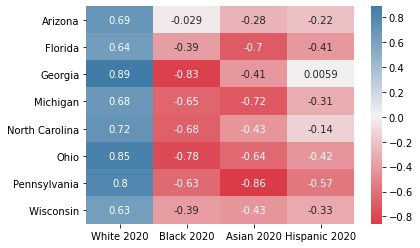

In [120]:
ethnicity_2020 = ethnicity_filtered[ethnicity_filtered['year_Arizona'] == 2020]
ethnicity_2020.drop('year_Arizona',axis = 1, inplace = True)
print(ethnicity_2020)
ethnicity_2020.columns = ['Arizona', 'Florida', 'Georgia', 'Michigan', 'North Carolina','Ohio','Pennsylvania',' Wisconsin']
ethnicity_2020_t = ethnicity_2020.transpose()
ethnicity_2020_t.columns = ['White 2020','Black 2020','Asian 2020','Hispanic 2020']
cmap = sn.diverging_palette(10,240, as_cmap=True)
ax = sn.heatmap(ethnicity_2020_t, annot=True, cmap = cmap)
plt.xticks(rotation=45)
plt.title("2020 Democratic/Ethnicity Correlations")
plt.show()

In [ ]:
ethnicity_2016 = ethnicity_filtered[ethnicity_filtered['year_Arizona'] == 2016]
ethnicity_2016.drop('year_Arizona',axis = 1, inplace = True)
ethnicity_2016.columns = ['Arizona', 'Florida', 'Georgia', 'Michigan', 'North Carolina','Ohio','Pennsylvania',' Wisconsin']
ethnicity_2016_t = ethnicity_2016.transpose()
ethnicity_2016_t.columns = ['White 2016','Black 2016','Asian 2016','Hispanic 2016']
cmap = sn.diverging_palette(10,240, as_cmap=True)
ax = sn.heatmap(ethnicity_2016_t, annot=True, cmap = cmap)
plt.xticks(rotation=45)
plt.title("2016 Democratic/Ethnicity Correlations")
plt.show()

/Users/anderssimmeth/.pyenv/versions/3.8.6/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


AttributeError: module 'matplotlib' has no attribute 'xticks'

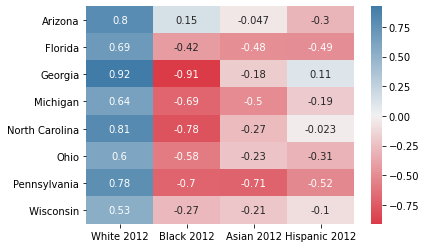

In [121]:
ethnicity_2012 = ethnicity_filtered[ethnicity_filtered['year_Arizona'] == 2012]
ethnicity_2012.drop('year_Arizona',axis = 1, inplace = True)
ethnicity_2012.columns = ['Arizona', 'Florida', 'Georgia', 'Michigan', 'North Carolina','Ohio','Pennsylvania',' Wisconsin']
ethnicity_2012_t = ethnicity_2012.transpose()
ethnicity_2012_t.columns = ['White 2012','Black 2012','Asian 2012','Hispanic 2012']
cmap = sn.diverging_palette(10,240, as_cmap=True)
ax = sn.heatmap(ethnicity_2012_t, annot=True, cmap = cmap)
plt.xticks(rotation=45)
plt.title("2012 Democratic/Ethnicity Correlations")
plt.show()

Age idea. 4 seperate correlation matrices with 3 each for each year. Can line them all up together. Need to check if the percentage of positive to negative correlation is identical.

In [122]:
ethnicity_2020_t
ethnicity_2016_t
ethnicity_2012_t
ethnicity_matrix = pd.concat([ethnicity_2012_t,ethnicity_2016_t,ethnicity_2020_t], axis = 1)
ethnicity_matrix = ethnicity_matrix[['White 2012', 
 'White 2016', 
 'White 2020', 
 'Black 2012', 
 'Black 2016',
 'Black 2020',
 'Asian 2012', 
 'Asian 2016',
 'Asian 2020',
 'Hispanic 2012',
 'Hispanic 2016',
 'Hispanic 2020']]
ethnicity_matrix.to_csv('ethnicity_matrix.csv')
fig, ax = plt.subplots(figsize=(18,6))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
ax = sn.heatmap(ethnicity_matrix, annot=True, cmap = cmap, linewidths=.5, annot_kws={"fontsize":14})
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 11)
plt.xticks(rotation=45)
fig.autofmt_xdate()
plt.title("Democratic/Ethnicity Correlations", fontsize = 14)
plt.savefig('../graphs/ethnicity_heatmap.png')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'

In [123]:
ethnicity_2020_t
ethnicity_2016_t
ethnicity_2012_t
ethnicity_matrix = pd.concat([ethnicity_2012_t,ethnicity_2016_t,ethnicity_2020_t], axis = 1)
ethnicity_matrix = ethnicity_matrix[['White 2012', 
 'White 2016', 
 'White 2020', 
 'Black 2012', 
 'Black 2016',
 'Black 2020',
 'Asian 2012', 
 'Asian 2016',
 'Asian 2020',
 'Hispanic 2012',
 'Hispanic 2016',
 'Hispanic 2020']]
ethnicity_matrix.to_csv('ethnicity_matrix.csv')
fig, ax = plt.subplots(figsize=(18,6))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
ax = sn.heatmap(ethnicity_matrix, annot=True, cmap = cmap, linewidths=.5, annot_kws={"fontsize":14})
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 11)
plt.xticks(rotation=45)
fig.autofmt_xdate()
plt.title("Democratic/Ethnicity Correlations", fontsize = 14)
plt.savefig('./ethnicity_heatmap.png')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'

### Create Grouped Bar Chart for 2012, 2016, and 2020 that will show the correlation difference for each state for a selected variable

In [124]:

ethnicity_filtered = dem_filtered[dem_filtered.index.isin(['bq_white_pop_pct','bq_hispanic_pop_pct','bq_black_pop_pct','bq_asian_pop_pct'])]


In [93]:
cols = [c for c in filtered_corr_master.columns if c.lower()[:3] == 'dem']
dem_filtered = filtered_corr_master[['year_Arizona'] + cols]
dem_filtered.reset_index(inplace = True)
dem_filtered["index"] = dem_filtered["index"] + dem_filtered["year_Arizona"].astype(str)
dem_filtered.drop(['year_Arizona'],axis=1, inplace = True)
dem_filtered.set_index('index', inplace=True)
#df = ethnicity_filtered.groupby(['index','year_Arizona']).sum()
dem_filtered_t = dem_filtered.transpose()
dem_filtered_t

<ipython-input-93-d492c9b96f8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem_filtered["index"] = dem_filtered["index"] + dem_filtered["year_Arizona"].astype(str)


index,bq_pct_masters2012,bq_pct_bachelors2012,bq_pct_associates2012,bq_high_school2012,college_educated_pct2012,non_college_educated_pct2012,bq_median_age2012,bq_white_pop_pct2012,bq_black_pop_pct2012,bq_asian_pop_pct2012,...,bq_high_school2020,college_educated_pct2020,non_college_educated_pct2020,bq_median_age2020,bq_white_pop_pct2020,bq_black_pop_pct2020,bq_asian_pop_pct2020,bq_hispanic_pop_pct2020,male_pct2020,female_pct2020
dem_pct_Arizona,0.049623,0.081975,-0.530747,-0.440929,0.073059,-0.762352,-0.575500,-0.806931,-0.145297,0.044337,...,-0.511489,0.322819,-0.776650,-0.566940,-0.695236,0.020776,0.277069,0.222513,-0.640170,0.640170
dem_pct_Florida,0.353299,0.384325,0.189252,-0.288226,0.381333,-0.222655,-0.100120,-0.693049,0.419074,0.475388,...,-0.571477,0.589415,-0.406660,-0.134212,-0.643802,0.389884,0.692132,0.420529,-0.611944,0.611944
dem_pct_Georgia,0.011450,-0.015358,-0.122257,0.014217,-0.007621,-0.101537,-0.157670,-0.927476,0.916837,0.171894,...,-0.163655,0.241816,-0.218223,-0.250560,-0.892569,0.836943,0.401164,-0.012395,0.003336,-0.003336
dem_pct_Michigan,0.275034,0.222322,-0.076447,-0.460396,0.248371,-0.396404,-0.304002,-0.644583,0.696451,0.503828,...,-0.750478,0.702077,-0.701897,-0.448772,-0.676101,0.656176,0.720199,0.306296,-0.320920,0.320920
dem_pct_North Carolina,0.137972,0.040558,-0.421031,-0.264559,0.075944,-0.437629,-0.327433,-0.823390,0.799847,0.261568,...,-0.343483,0.314294,-0.537841,-0.405519,-0.727216,0.696091,0.417997,0.134928,-0.220948,0.220948
dem_pct_Ohio,0.183492,0.201166,-0.015071,-0.250754,0.201116,-0.093960,0.030632,-0.625692,0.601804,0.249145,...,-0.694526,0.686335,-0.519694,-0.288121,-0.851751,0.784489,0.633345,0.417518,-0.314351,0.314351
dem_pct_Pennsylvania,0.572597,0.543750,-0.147601,-0.662211,0.565059,-0.551573,-0.415154,-0.783060,0.708271,0.709157,...,-0.850833,0.772514,-0.762115,-0.546963,-0.800213,0.632987,0.859533,0.567420,-0.210827,0.210827
dem_pct_Wisconsin,-0.008732,-0.124825,-0.067069,-0.280048,-0.092891,-0.247948,-0.331173,-0.547650,0.279121,0.214064,...,-0.653901,0.397155,-0.616726,-0.510971,-0.644336,0.391371,0.412829,0.328524,-0.330092,0.330092


### Age Dem

In [94]:

labels = ['Arizona', 'Florida', 'Georgia', 'Michigan', 'North Carolina','Ohio','Pennsylvania',' Wisconsin']
list_2012 = dem_filtered_t.bq_median_age2012
list_2016 = dem_filtered_t.bq_median_age2016
list_2020 = dem_filtered_t.bq_median_age2020

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, list_2012, width /3, label='2012')
rects2 = ax.bar(x, list_2016, width /3, label='2016')
rects3 = ax.bar(x + width/3, list_2020, width /3, label='2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=45)
ax.legend()
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Year')


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'

## White Ethnicity

In [77]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Arizona', 'Florida', 'Georgia', 'Michigan', 'North Carolina','Ohio','Pennsylvania',' Wisconsin']
white_2012 = ethnicity_t.bq_white_pop_pct2012
white_2016 = ethnicity_t.bq_white_pop_pct2016
white_2020 = ethnicity_t.bq_white_pop_pct2020

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, white_2012, width /3, label='2012')
rects2 = ax.bar(x, white_2016, width /3, label='2016')
rects3 = ax.bar(x + width/3, white_2020, width /3, label='2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.legend()
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Year')


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

NameError: name 'ethnicity_t' is not defined

### DEM College Educated

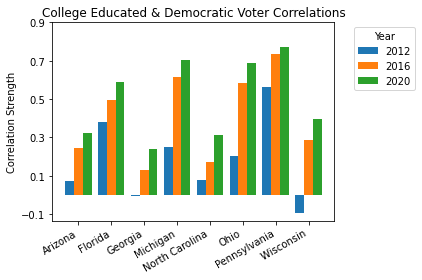

In [78]:

labels = ['Arizona', 'Florida', 'Georgia', 'Michigan', 'North Carolina','Ohio','Pennsylvania',' Wisconsin']
list_2012 = dem_filtered_t.college_educated_pct2012
list_2016 = dem_filtered_t.college_educated_pct2016
list_2020 = dem_filtered_t.college_educated_pct2020

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, list_2012, width /3, label='2012')
rects2 = ax.bar(x, list_2016, width /3, label='2016')
rects3 = ax.bar(x + width/3, list_2020, width /3, label='2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation Strength')
ax.set_title('College Educated & Democratic Voter Correlations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Year')

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
plt.yticks(np.arange(-.1, 1, step=0.2))
fig.autofmt_xdate()
fig.tight_layout()
plt.savefig('../graphs/college_educated.png')
plt.show()

### Not College Educated

In [79]:

labels = ['Arizona', 'Florida', 'Georgia', 'Michigan', 'North Carolina','Ohio','Pennsylvania',' Wisconsin']
list_2012 = gop_filtered_t.non_college_educated_pct2012
list_2016 = gop_filtered_t.non_college_educated_pct2016
list_2020 = gop_filtered_t.non_college_educated_pct2020

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, list_2012, width /3, label='2012')
rects2 = ax.bar(x, list_2016, width /3, label='2016')
rects3 = ax.bar(x + width/3, list_2020, width /3, label='2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation Strength')
ax.set_title('Non-College Educated & Republican Voter Correlations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Year')

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
fig.autofmt_xdate()
plt.yticks(np.arange(0, 1, step=0.2))
fig.tight_layout()
plt.savefig('./non_college.png')
plt.show()

NameError: name 'gop_filtered_t' is not defined

# GOP

In [80]:
cols = [c for c in filtered_corr_master.columns if c.lower()[:3] == 'gop']
gop_filtered = filtered_corr_master[['year_Arizona'] + cols]
gop_filtered.reset_index(inplace = True)
gop_filtered["index"] = gop_filtered["index"] + gop_filtered["year_Arizona"].astype(str)
gop_filtered.drop(['year_Arizona'],axis=1, inplace = True)
gop_filtered.set_index('index', inplace=True)
#df = ethnicity_filtered.groupby(['index','year_Arizona']).sum()
gop_filtered_t = gop_filtered.transpose()
gop_filtered_t

<ipython-input-80-3fb21da17bb4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gop_filtered["index"] = gop_filtered["index"] + gop_filtered["year_Arizona"].astype(str)
/Users/anderssimmeth/.pyenv/versions/3.8.6/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


index,bq_pct_masters2012,bq_pct_bachelors2012,bq_pct_associates2012,bq_high_school2012,college_educated_pct2012,non_college_educated_pct2012,bq_median_age2012,bq_white_pop_pct2012,bq_black_pop_pct2012,bq_asian_pop_pct2012,...,bq_high_school2020,college_educated_pct2020,non_college_educated_pct2020,bq_median_age2020,bq_white_pop_pct2020,bq_black_pop_pct2020,bq_asian_pop_pct2020,bq_hispanic_pop_pct2020,male_pct2020,female_pct2020
gop_pct_Arizona,-0.056139,-0.087616,0.523595,0.435100,-0.079102,0.754914,0.571623,0.797391,0.146072,-0.046929,...,0.521676,-0.329185,0.782208,0.575395,0.692013,-0.028514,-0.281998,-0.222311,0.634452,-0.634452
gop_pct_Florida,-0.351862,-0.382616,-0.190185,0.291868,-0.379678,0.226042,0.105656,0.689391,-0.417197,-0.480021,...,0.582177,-0.594084,0.409891,0.143084,0.639055,-0.387298,-0.701849,-0.414959,0.615302,-0.615302
gop_pct_Georgia,-0.021349,0.004274,0.123959,-0.001153,-0.003483,0.112988,0.166568,0.922387,-0.909098,-0.182369,...,0.180026,-0.255563,0.231313,0.261579,0.886612,-0.827511,-0.410393,0.005877,-0.001501,0.001501
gop_pct_Michigan,-0.269540,-0.218126,0.078026,0.457227,-0.243574,0.394803,0.303490,0.635725,-0.690303,-0.501985,...,0.759329,-0.701582,0.711024,0.465472,0.675445,-0.653327,-0.720180,-0.314906,0.320612,-0.320612
gop_pct_North Carolina,-0.153152,-0.054422,0.425506,0.276954,-0.090783,0.449558,0.333130,0.808035,-0.781863,-0.270753,...,0.363904,-0.331887,0.552295,0.418591,0.715939,-0.681132,-0.429447,-0.139482,0.220130,-0.220130
gop_pct_Ohio,-0.160151,-0.173818,0.013071,0.227103,-0.174271,0.077506,-0.034468,0.604377,-0.581330,-0.229294,...,0.696069,-0.688106,0.519641,0.293998,0.851517,-0.780654,-0.635152,-0.424996,0.318861,-0.318861
gop_pct_Pennsylvania,-0.570506,-0.539423,0.147195,0.660214,-0.561411,0.550263,0.417863,0.777147,-0.701596,-0.705808,...,0.852424,-0.773285,0.763689,0.549170,0.798593,-0.630150,-0.859356,-0.567978,0.210030,-0.210030
gop_pct_Wisconsin,0.007255,0.123321,0.056831,0.281599,0.091367,0.251150,0.336215,0.533965,-0.272761,-0.213597,...,0.667364,-0.406600,0.632690,0.531955,0.629745,-0.392963,-0.427149,-0.331148,0.343433,-0.343433


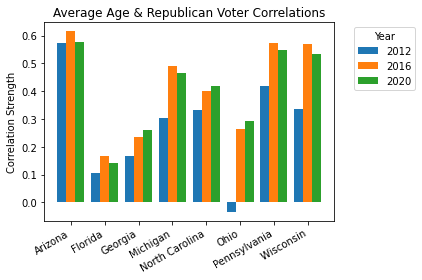

In [81]:

labels = ['Arizona', 'Florida', 'Georgia', 'Michigan', 'North Carolina','Ohio','Pennsylvania',' Wisconsin']
list_2012 = gop_filtered_t.bq_median_age2012
list_2016 = gop_filtered_t.bq_median_age2016
list_2020 = gop_filtered_t.bq_median_age2020

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, list_2012, width /3, label='2012')
rects2 = ax.bar(x, list_2016, width /3, label='2016')
rects3 = ax.bar(x + width/3, list_2020, width /3, label='2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation Strength')
ax.set_title('Average Age & Republican Voter Correlations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Year')

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
fig.autofmt_xdate()
#plt.yticks(np.arange(0, 1, step=0.2))
fig.tight_layout()

plt.show()

### Masters

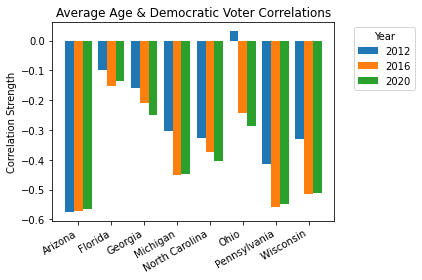

In [82]:
labels = ['Arizona', 'Florida', 'Georgia', 'Michigan', 'North Carolina','Ohio','Pennsylvania',' Wisconsin']
list_2012 = dem_filtered_t.bq_median_age2012
list_2016 = dem_filtered_t.bq_median_age2016
list_2020 = dem_filtered_t.bq_median_age2020

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, list_2012, width /3, label='2012')
rects2 = ax.bar(x, list_2016, width /3, label='2016')
rects3 = ax.bar(x + width/3, list_2020, width /3, label='2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation Strength')
ax.set_title('Average Age & Democratic Voter Correlations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=45)
ax.legend()
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Year')


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
fig.autofmt_xdate()
fig.tight_layout()

plt.show()